<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/Nadav/Sales_Prediction_by_Category_and_Channel_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.flush_and_unmount()

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from holidays import country_holidays

In [4]:
cleaned_data = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/cleaned_data_with_sales_channel.csv')

In [5]:
desc_encoding_map = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/desc_encoding_map.csv')

In [6]:
category_code_map = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/category_mapping.csv')

In [7]:
# עותק מהנתונים המקוריים
df = cleaned_data.copy()

In [8]:
# צור מילון: קוד קטגוריה -> שם קטגוריה
category_map = category_code_map.set_index('קוד')['קטגוריה'].to_dict()

In [9]:
# בנה LabelEncoder על שמות הקטגוריה
category_encoder = LabelEncoder()
category_encoder.fit(list(category_map.values()))

LabelEncoder()

In [10]:
# === ערוץ מכירה ===
channel_encoder = LabelEncoder()
df['sales_channel_encoded'] = channel_encoder.fit_transform(df['sales_channel'])

In [11]:
# נגדיר מטרות (target)
y_category = df['category_encoded']
y_channel = df['sales_channel_encoded']

# נגדיר אילו עמודות לא נכלול ב-X (כדי לא "לרמות" את המודל)
excluded_columns = [
    'category_encoded',
    'sales_channel_encoded',
    'sales_channel',
    'Date',
    'כמות',
    'סכום',
    'order']

# נגדיר את רשימת הפיצ'רים
feature_cols = [col for col in df.columns if col not in excluded_columns]

# ניצור את X
X = df[feature_cols]

In [12]:
# פיצול לפי אינדקס כרונולוגי
split_index = int(len(df) * 0.8)

# פיצול X
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

# פיצול y עבור שני המודלים
y_train_category = y_category.iloc[:split_index]
y_test_category = y_category.iloc[split_index:]

y_train_channel = y_channel.iloc[:split_index]
y_test_channel = y_channel.iloc[split_index:]

In [13]:
# === מודל לחיזוי סוג מוצר ===
model_category = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss')

model_category.fit(X_train, y_train_category)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:
# === מודל לחיזוי ערוץ מכירה ===
model_channel = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss')

model_channel.fit(X_train, y_train_channel)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
model_features = X_train.columns.tolist()

In [16]:
# === חיזוי על סט הבדיקה ===
y_pred_category = model_category.predict(X_test)
y_pred_channel = model_channel.predict(X_test)

In [17]:
# === דיוק + דו"ח קטגוריה ===
print("🔎 דיוק מודל קטגוריה (סוג מוצר):")
print("Accuracy:", accuracy_score(y_test_category, y_pred_category))
print("\nClassification Report:")
print(classification_report(y_test_category, y_pred_category))

🔎 דיוק מודל קטגוריה (סוג מוצר):
Accuracy: 0.9958889586083043

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       563
           1       1.00      1.00      1.00      4376
           2       1.00      0.99      0.99     18100
           3       1.00      1.00      1.00      1193
           4       1.00      1.00      1.00      4218
           5       1.00      1.00      1.00      3310
           6       1.00      1.00      1.00     14457

    accuracy                           1.00     46217
   macro avg       0.97      0.98      0.98     46217
weighted avg       1.00      1.00      1.00     46217



In [18]:
# === דיוק + דו"ח ערוץ מכירה ===
print("\n🔎 דיוק מודל ערוץ מכירה:")
print("Accuracy:", accuracy_score(y_test_channel, y_pred_channel))
print("\nClassification Report:")
print(classification_report(y_test_channel, y_pred_channel))


🔎 דיוק מודל ערוץ מכירה:
Accuracy: 0.3547828721033386

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.09      0.13     12427
           1       0.14      0.00      0.01      4620
           2       0.16      0.02      0.03      8348
           3       0.00      0.00      0.00      1383
           4       0.00      0.00      0.00      2388
           5       0.37      0.89      0.52     17051

    accuracy                           0.35     46217
   macro avg       0.16      0.17      0.12     46217
weighted avg       0.25      0.35      0.23     46217



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


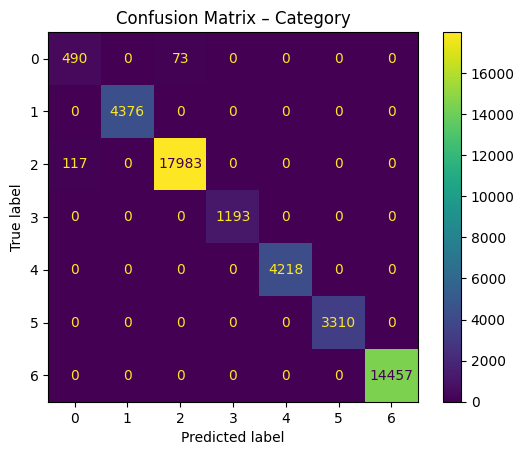

In [19]:
# === מטריצת בלבול (אופציונלי) ===
ConfusionMatrixDisplay.from_predictions(y_test_category, y_pred_category)
plt.title("Confusion Matrix – Category")
plt.show()

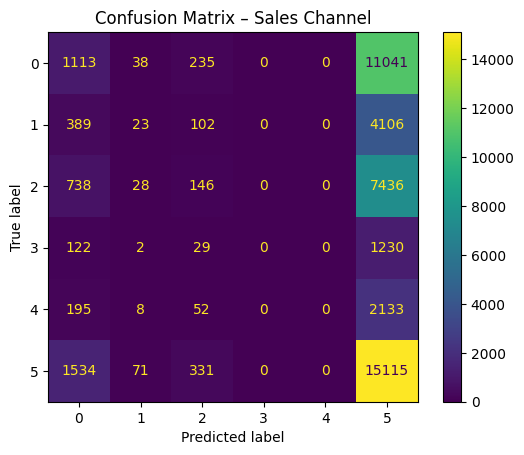

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test_channel, y_pred_channel)
plt.title("Confusion Matrix – Sales Channel")
plt.show()

In [21]:
# import joblib

# # === רשימת הפיצ'רים ששימשה את המודל ===
# model_features = X_train.columns.tolist()

# # === שמירה לתוך קבצים ===
# joblib.dump(model_category, '/content/drive/MyDrive/Final_Project_PapaJohns/model_category.pkl')
# joblib.dump(model_channel, '/content/drive/MyDrive/Final_Project_PapaJohns/model_channel.pkl')

# joblib.dump(category_encoder, '/content/drive/MyDrive/Final_Project_PapaJohns/category_encoder.pkl')
# joblib.dump(channel_encoder, '/content/drive/MyDrive/Final_Project_PapaJohns/channel_encoder.pkl')

# joblib.dump(model_features, '/content/drive/MyDrive/Final_Project_PapaJohns/model_features.pkl')

In [22]:
# model_category = joblib.load('model_category.pkl')
# channel_encoder = joblib.load('channel_encoder.pkl')

In [23]:
def build_future_features(forecast_date: str, full_df, desc_map_df, model_features):
    date = pd.to_datetime(forecast_date)
    day = date.day
    month = date.month
    year = date.year
    week = date.isocalendar().week
    day_name = ((date.dayofweek + 1) % 7) + 1  # יום בשבוע (1-7)
    is_weekend = int(day_name in [6, 7])

    # חגים
    il_holidays = country_holidays('IL')
    christian_holidays = country_holidays('US')
    is_jewish_holiday = date in il_holidays
    is_christian_holiday = date in christian_holidays
    is_near_jewish_holiday = (
        (date + pd.Timedelta(days=1) in il_holidays) or
        (date - pd.Timedelta(days=1) in il_holidays)
    )
    is_day_before_new_year = int(month == 12 and day == 31)
    is_start_of_month = int(day <= 3)
    is_end_of_month = int(day >= 28)
    season = (month % 12) // 3 + 1

    # פיצ'רים מעגליים
    day_name_sin = np.sin(2 * np.pi * day_name / 7)
    day_name_cos = np.cos(2 * np.pi * day_name / 7)
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)

    # כל הקטגוריות (מוצרים) האפשריים
    categories = full_df['clean_desc_encoded'].unique()

    # ממוצעים לכל מוצר
    avg_quantity = full_df.groupby('clean_desc_encoded')['כמות'].mean()
    std_quantity = full_df.groupby('clean_desc_encoded')['כמות'].std()
    days_sold = full_df.groupby('clean_desc_encoded')['Date'].nunique()
    max_days = days_sold.max()

    # מפת portion_type אם קיימת
    portion_map = desc_map_df.set_index('code')['portion_type'].to_dict() if 'portion_type' in desc_map_df.columns else {}

    rows = []
    for cat in categories:
        recent_avg = full_df[
            (full_df['clean_desc_encoded'] == cat) &
            (pd.to_datetime(full_df['Date']) < date)
        ].sort_values('Date').tail(30)['כמות'].mean()

        row = {
            'clean_desc_encoded': cat,
            'Year': year,
            'Month': month,
            'Day': day,
            'WeekOfYear': week,
            'Day_Name': day_name,
            'Is_Weekend': is_weekend,
            'is_jewish_holiday': is_jewish_holiday,
            'is_christian_holiday': is_christian_holiday,
            'is_near_jewish_holiday': is_near_jewish_holiday,
            'is_day_before_new_year': is_day_before_new_year,
            'is_start_of_month': is_start_of_month,
            'is_end_of_month': is_end_of_month,
            'Season': season,
            'Day_Name_sin': day_name_sin,
            'Day_Name_cos': day_name_cos,
            'Month_sin': month_sin,
            'Month_cos': month_cos,
            'recent_avg_quantity': recent_avg if not np.isnan(recent_avg) else 0,
            'avg_quantity_all_time': avg_quantity.get(cat, 0),
            'std_quantity_all_time': std_quantity.get(cat, 0),
            'num_days_sold': days_sold.get(cat, 0),
            'popularity_score': days_sold.get(cat, 0) / max_days if max_days > 0 else 0,
            'portion_type': portion_map.get(cat, 'unknown')
        }

        # ודא שכל הפיצ'רים שהמודל מכיר נמצאים
        row = {**row, **{col: 0 for col in model_features if col not in row}}
        rows.append(row)

    future_df = pd.DataFrame(rows)

    # מיפוי שם מוצר (אם רוצים להחזיר)
    desc_map_dict = desc_map_df.set_index('code')['Unnamed: 0'].to_dict()
    future_df['category_name'] = future_df['clean_desc_encoded'].map(desc_map_dict)

    return future_df

In [24]:
def predict_sales_by_date(
    forecast_date: str,
    model_category,
    model_channel,
    full_df,
    model_features,
    desc_map_df,
    label_encoder_category,
    label_encoder_channel,
    category_code_map
):
    # צור את תצפיות התחזית
    future_df = build_future_features(
        forecast_date=forecast_date,
        full_df=full_df,
        desc_map_df=desc_map_df,
        model_features=model_features
    )

    # ודא שהקידוד מספרי
    future_df['clean_desc_encoded'] = future_df['clean_desc_encoded'].astype(int)

    # מיפוי שם מוצר
    name_map = desc_map_df.set_index('code')['Unnamed: 0'].to_dict()
    # לא צריך להפוך שום דבר ל-int
    future_df['Product_Name'] = future_df['clean_desc_encoded'].map(name_map)

    # קידוד portion_type אם נדרש
    if 'portion_type' in future_df.columns and future_df['portion_type'].dtype == 'object':
        future_df['portion_type'] = LabelEncoder().fit_transform(future_df['portion_type'])

    # חיזוי בפועל
    X_future = future_df[model_features]
    y_pred_category = model_category.predict(X_future)
    y_pred_channel = model_channel.predict(X_future)

    # תרגום לפלט אנושי
    category_names = [category_code_map.get(code, 'unknown') for code in y_pred_category]
    channel_names = label_encoder_channel.inverse_transform(y_pred_channel)

    # טבלת התחזיות
    result = pd.DataFrame({
        'Date': forecast_date,
        'Product_Name': future_df['Product_Name'],
        'Predicted_Category': category_names,
        'Predicted_Channel': channel_names
    })

    return result

## 🔍 Model Usage Explanation

The `predict_sales_by_date` function uses two separate classification models:

- **model_category**: Predicts the product category (e.g., Pizza, Drink, Topping, Other).
- **model_channel**: Predicts the sales channel (e.g., App, Phone, Wolt, 10bis).

For each existing product in the dataset, the function generates a future observation for the selected date, using relevant features such as:

- Day of the week  
- Season  
- Holidays  
- Recent sales trends  
- And more...

These features are passed to both models simultaneously:

- `model_category` returns the predicted category for the product  
- `model_channel` returns the predicted sales channel

### 📊 Output

The result is a table showing, for each product:

- Product name  
- Predicted category  
- Predicted sales channel

This enables accurate, data-driven forecasting to support business decision-making.

In [25]:
forecast = predict_sales_by_date(
    forecast_date="2025-04-25",
    model_category=model_category,
    model_channel=model_channel,
    full_df=df,
    model_features=model_features,
    desc_map_df=desc_encoding_map,
    label_encoder_category=category_encoder,
    label_encoder_channel=channel_encoder,
    category_code_map=category_map)

In [27]:
forecast.sample(5)

,Date,Product_Name,Predicted_Category,Predicted_Channel
143,2025-04-25,הפתעה ארוחת ילדים קעקועים / מדבקות,אחר,10bis
106,2025-04-25,טוליפ 16,מנה עיקרית,10bis
157,2025-04-25,3 משולשי קרטון לפיצה,קינוח,10bis
167,2025-04-25,דקה,קינוח,10bis
186,2025-04-25,פיצה איטסיין שתיה ב 55,מנה עיקרית,Wolt


## 🧠 Model Training Summary

Both the `model_category` and `model_channel` models are trained on historical sales data.

### 1. **Data Preparation**
- The dataset includes extensive sales records: product names, timestamps, sales channels, categories, units sold, and contextual metadata such as day of the week, holidays, and seasons.
- The data is normalized, encoded, and prepared in a format suitable for training.

### 2. **Feature Engineering**
- Features include time-based variables (e.g., weekday, month), moving average sales, holiday indicators, and lagged sales values.
- These are designed to capture trends and seasonality effectively.

### 3. **Model Training**
- Supervised learning algorithms (such as Random Forest, XGBoost, or similar) are used.
- The dataset is split into training and validation sets to assess model performance.
- Key metrics like accuracy, F1-score, and confusion matrices are tracked.

### 4. **Model Selection & Optimization**
- The best-performing model is selected based on validation results.
- Hyperparameters are fine-tuned using cross-validation.

### 5. **Deployment**
- Trained models are saved and integrated into the prediction pipeline.
- On each new input date, features are computed dynamically and passed to the models for real-time prediction.

> This training process ensures the models are well-calibrated and can generalize effectively to new, unseen data.